# ЗАГРУЗКА И ОПИСАНИЕ ДАННЫХ

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
* сalls — количество звонков,
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений,
* mb_used — израсходованный интернет-трафик в Мб,
  is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)
  
***Цель проекта:*** Построить модель для задачи классификации, которая выберет подходящий тариф для каждого пользователя с accuracy не менее 0.75

Загрузим данные и необходимые библиотеки

In [ ]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
try:
    df=pd.read_csv('users_behavior.csv', sep=',')
except:
    df=pd.read_csv('/datasets/users_behavior.csv', sep=',')

pd.options.display.float_format = '{:.2f}'.format

In [ ]:
display(df.head())

,calls,minutes,messages,mb_used,is_ultra
0,40,311.90,83,19915.42,0
1,85,516.75,56,22696.96,0
2,77,467.66,86,21060.45,0
3,106,745.53,81,8437.39,1
4,66,418.74,1,14502.75,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     2566 non-null   int64  
 1   minutes   2566 non-null   float64
 2   messages  2566 non-null   int64  
 3   mb_used   2566 non-null   float64
 4   is_ultra  2566 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 100.4 KB


Выделим 20% данных для тестовой выборки

In [ ]:
df_test=df.loc[2571:]
print(df_test.tail())

Empty DataFrame
Columns: [calls, minutes, messages, mb_used, is_ultra]
Index: []


# ОБУЧЕНИЕ МОДЕЛЕЙ

Определим признаки и целевой признак

In [ ]:
features = df.loc[:2571].drop(['is_ultra'], axis=1)
target = df.loc[:2571]['is_ultra']

Разделим исходные данные на обучающую, валидационную и тестовую выборку

In [ ]:
features_train, features_valid, target_train, target_valid = train_test_split(
features, target, test_size=0.20, random_state=12345)

Обучим модель дерева решений с изменением глубины

In [ ]:
best_model = None
best_result = 0
for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions_valid)
    print("max_depth =", depth, ": ", end='')
    print(result)
    if result > best_result:
        best_model = model
        best_result = result
print("Accuracy наилучшей модели на валидационной выборке:", best_result)

max_depth = 1 : 0.7470817120622568
max_depth = 2 : 0.7879377431906615
max_depth = 3 : 0.8015564202334631
max_depth = 4 : 0.8093385214007782
max_depth = 5 : 0.7996108949416343
max_depth = 6 : 0.8015564202334631
max_depth = 7 : 0.811284046692607
max_depth = 8 : 0.7996108949416343
max_depth = 9 : 0.7976653696498055
max_depth = 10 : 0.7821011673151751
max_depth = 11 : 0.7801556420233463
max_depth = 12 : 0.754863813229572
max_depth = 13 : 0.7723735408560312
max_depth = 14 : 0.7723735408560312
max_depth = 15 : 0.7762645914396887
max_depth = 16 : 0.7665369649805448
max_depth = 17 : 0.7626459143968871
max_depth = 18 : 0.7529182879377432
max_depth = 19 : 0.7470817120622568
max_depth = 20 : 0.7431906614785992
max_depth = 21 : 0.7490272373540856
max_depth = 22 : 0.745136186770428
max_depth = 23 : 0.7490272373540856
max_depth = 24 : 0.7490272373540856
max_depth = 25 : 0.7490272373540856
max_depth = 26 : 0.7490272373540856
max_depth = 27 : 0.7490272373540856
max_depth = 28 : 0.7490272373540856
max_

### Вывод 1:###
Модель дерева решений может давать предсказания с достаточно высокой долей правильных ответов.
Максимальное ***accuracy равное 0.788*** достигнуто для глубины равной 4. При увеличении глубины
точность предсказания падает

Обучим модель случайный лес

In [ ]:
best_model = None
best_result = 0
for est in range(1, 40):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions_valid)
    print("max_est =", est, ": ", end='')
    print(result)
    if result > best_result:
        best_model = model
        best_result = result

print("Accuracy наилучшей модели на валидационной выборке:", best_result)


max_est = 1 : 0.7159533073929961
max_est = 2 : 0.7587548638132295
max_est = 3 : 0.7490272373540856
max_est = 4 : 0.7684824902723736
max_est = 5 : 0.7665369649805448
max_est = 6 : 0.7723735408560312
max_est = 7 : 0.7626459143968871
max_est = 8 : 0.7859922178988327
max_est = 9 : 0.7762645914396887
max_est = 10 : 0.7821011673151751
max_est = 11 : 0.77431906614786
max_est = 12 : 0.7782101167315175
max_est = 13 : 0.7782101167315175
max_est = 14 : 0.7704280155642024
max_est = 15 : 0.7782101167315175
max_est = 16 : 0.7762645914396887
max_est = 17 : 0.7859922178988327
max_est = 18 : 0.7879377431906615
max_est = 19 : 0.7821011673151751
max_est = 20 : 0.791828793774319
max_est = 21 : 0.7976653696498055
max_est = 22 : 0.7996108949416343
max_est = 23 : 0.7957198443579766
max_est = 24 : 0.7996108949416343
max_est = 25 : 0.791828793774319
max_est = 26 : 0.7976653696498055
max_est = 27 : 0.7996108949416343
max_est = 28 : 0.8054474708171206
max_est = 29 : 0.8073929961089494
max_est = 30 : 0.8093385214

### Вывод 2:###
Модель случайного леса с глубиной равной 1 может давать предсказания немного точнее чем дерево решений.
Максимальное ***accuracy равное 0.794*** достигнуто для количества деревьев равное 27. При увеличении количества деревьев
точность предсказания падает

Обучим модель случайный лес с изменением глубины

In [ ]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(1, 20, 1):
    for depth in range (1, 30):
        for samples_split in range (2, 4):
            for samples_leaf in range (1, 4):
                model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth, min_samples_split=samples_split,
                                     min_samples_leaf=samples_leaf)
                model.fit(features_train, target_train )
                result = model.score(features_valid, target_valid)
                print("max_est =", est, "max_depth =", depth, ": ", end='')
                print(result)
                if result > best_result:
                    best_model = model
                    best_result = result
                    best_est = est
                    best_depth = depth
print("Accuracy наилучшей модели на валидационной выборке:",
      best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth, "Количество деревьев:",
      "Минимальное количество примеров для разделения:", samples_split,
     "Минимальное количество объектов в листе:", samples_split)

max_est = 1 max_depth = 1 : 0.12376867427792193
max_est = 1 max_depth = 1 : 0.12376867427792193
max_est = 1 max_depth = 1 : 0.12376867427792193
max_est = 1 max_depth = 1 : 0.12376867427792193
max_est = 1 max_depth = 1 : 0.12376867427792193
max_est = 1 max_depth = 1 : 0.12376867427792193
max_est = 1 max_depth = 2 : 0.2573912655689633
max_est = 1 max_depth = 2 : 0.2573912655689633
max_est = 1 max_depth = 2 : 0.2573912655689633
max_est = 1 max_depth = 2 : 0.2573912655689633
max_est = 1 max_depth = 2 : 0.2573912655689633
max_est = 1 max_depth = 2 : 0.2573912655689633
max_est = 1 max_depth = 3 : 0.28283099671664613
max_est = 1 max_depth = 3 : 0.28283099671664613
max_est = 1 max_depth = 3 : 0.28283099671664613
max_est = 1 max_depth = 3 : 0.28283099671664613
max_est = 1 max_depth = 3 : 0.28283099671664613
max_est = 1 max_depth = 3 : 0.28283099671664613
max_est = 1 max_depth = 4 : 0.2570846590048397
max_est = 1 max_depth = 4 : 0.2570846590048397
max_est = 1 max_depth = 4 : 0.2570846590048397
m

max_est = 1 max_depth = 29 : -0.06830436891231484
max_est = 1 max_depth = 29 : -0.3354516851698932
max_est = 1 max_depth = 29 : -0.22782551724928868
max_est = 1 max_depth = 29 : -0.06830436891231484
max_est = 2 max_depth = 1 : 0.12433711439512507
max_est = 2 max_depth = 1 : 0.12433711439512507
max_est = 2 max_depth = 1 : 0.12433711439512507
max_est = 2 max_depth = 1 : 0.12433711439512507
max_est = 2 max_depth = 1 : 0.12433711439512507
max_est = 2 max_depth = 1 : 0.12433711439512507
max_est = 2 max_depth = 2 : 0.24716476523101205
max_est = 2 max_depth = 2 : 0.24716476523101205
max_est = 2 max_depth = 2 : 0.24716476523101205
max_est = 2 max_depth = 2 : 0.24716476523101205
max_est = 2 max_depth = 2 : 0.24716476523101205
max_est = 2 max_depth = 2 : 0.24716476523101205
max_est = 2 max_depth = 3 : 0.2918758387657159
max_est = 2 max_depth = 3 : 0.2918758387657159
max_est = 2 max_depth = 3 : 0.2918758387657159
max_est = 2 max_depth = 3 : 0.2918758387657159
max_est = 2 max_depth = 3 : 0.2918758

max_est = 2 max_depth = 29 : 0.03616157445637236
max_est = 2 max_depth = 29 : 0.08023041665457376
max_est = 2 max_depth = 29 : 0.1554631613071772
max_est = 2 max_depth = 29 : 0.019878379037067795
max_est = 2 max_depth = 29 : 0.08023041665457376
max_est = 2 max_depth = 29 : 0.1554631613071772
max_est = 3 max_depth = 1 : 0.13973618706517843
max_est = 3 max_depth = 1 : 0.13973618706517843
max_est = 3 max_depth = 1 : 0.13973618706517843
max_est = 3 max_depth = 1 : 0.13973618706517843
max_est = 3 max_depth = 1 : 0.13973618706517843
max_est = 3 max_depth = 1 : 0.13973618706517843
max_est = 3 max_depth = 2 : 0.25325170771237615
max_est = 3 max_depth = 2 : 0.25325170771237615
max_est = 3 max_depth = 2 : 0.25325170771237615
max_est = 3 max_depth = 2 : 0.25325170771237615
max_est = 3 max_depth = 2 : 0.25325170771237615
max_est = 3 max_depth = 2 : 0.25325170771237615
max_est = 3 max_depth = 3 : 0.2991837317644861
max_est = 3 max_depth = 3 : 0.2991837317644861
max_est = 3 max_depth = 3 : 0.2991837

max_est = 3 max_depth = 28 : 0.23457494126942302
max_est = 3 max_depth = 28 : 0.18023571437066954
max_est = 3 max_depth = 28 : 0.16821884674265075
max_est = 3 max_depth = 28 : 0.23457494126942302
max_est = 3 max_depth = 29 : 0.17862495030125114
max_est = 3 max_depth = 29 : 0.16821884674265075
max_est = 3 max_depth = 29 : 0.23457494126942302
max_est = 3 max_depth = 29 : 0.18023571437066954
max_est = 3 max_depth = 29 : 0.16821884674265075
max_est = 3 max_depth = 29 : 0.23457494126942302
max_est = 4 max_depth = 1 : 0.14126296705251618
max_est = 4 max_depth = 1 : 0.14126296705251618
max_est = 4 max_depth = 1 : 0.14126296705251618
max_est = 4 max_depth = 1 : 0.14126296705251618
max_est = 4 max_depth = 1 : 0.14126296705251618
max_est = 4 max_depth = 1 : 0.14126296705251618
max_est = 4 max_depth = 2 : 0.25101543212957467
max_est = 4 max_depth = 2 : 0.25101543212957467
max_est = 4 max_depth = 2 : 0.25101543212957467
max_est = 4 max_depth = 2 : 0.25101543212957467
max_est = 4 max_depth = 2 : 0.

max_est = 4 max_depth = 27 : 0.25970175777699833
max_est = 4 max_depth = 28 : 0.18537967932837895
max_est = 4 max_depth = 28 : 0.1918107077047262
max_est = 4 max_depth = 28 : 0.25970175777699833
max_est = 4 max_depth = 28 : 0.20702889289346138
max_est = 4 max_depth = 28 : 0.1918107077047262
max_est = 4 max_depth = 28 : 0.25970175777699833
max_est = 4 max_depth = 29 : 0.18537967932837895
max_est = 4 max_depth = 29 : 0.1918107077047262
max_est = 4 max_depth = 29 : 0.25970175777699833
max_est = 4 max_depth = 29 : 0.20702889289346138
max_est = 4 max_depth = 29 : 0.1918107077047262
max_est = 4 max_depth = 29 : 0.25970175777699833
max_est = 5 max_depth = 1 : 0.1402651844897993
max_est = 5 max_depth = 1 : 0.1402651844897993
max_est = 5 max_depth = 1 : 0.1402651844897993
max_est = 5 max_depth = 1 : 0.1402651844897993
max_est = 5 max_depth = 1 : 0.1402651844897993
max_est = 5 max_depth = 1 : 0.1402651844897993
max_est = 5 max_depth = 2 : 0.2527031923510189
max_est = 5 max_depth = 2 : 0.25270319

max_est = 5 max_depth = 27 : 0.2052773916567271
max_est = 5 max_depth = 27 : 0.26366718787178733
max_est = 5 max_depth = 28 : 0.20063308560418402
max_est = 5 max_depth = 28 : 0.2052773916567271
max_est = 5 max_depth = 28 : 0.26366718787178733
max_est = 5 max_depth = 28 : 0.20226718965042678
max_est = 5 max_depth = 28 : 0.2052773916567271
max_est = 5 max_depth = 28 : 0.26366718787178733
max_est = 5 max_depth = 29 : 0.20063308560418402
max_est = 5 max_depth = 29 : 0.2052773916567271
max_est = 5 max_depth = 29 : 0.26366718787178733
max_est = 5 max_depth = 29 : 0.20226718965042678
max_est = 5 max_depth = 29 : 0.2052773916567271
max_est = 5 max_depth = 29 : 0.26366718787178733
max_est = 6 max_depth = 1 : 0.14023477420130892
max_est = 6 max_depth = 1 : 0.14023477420130892
max_est = 6 max_depth = 1 : 0.14023477420130892
max_est = 6 max_depth = 1 : 0.14023477420130892
max_est = 6 max_depth = 1 : 0.14023477420130892
max_est = 6 max_depth = 1 : 0.14023477420130892
max_est = 6 max_depth = 2 : 0.2

max_est = 6 max_depth = 27 : 0.23068767245890742
max_est = 6 max_depth = 27 : 0.23171327522994334
max_est = 6 max_depth = 27 : 0.27833983587340083
max_est = 6 max_depth = 28 : 0.23168027647796452
max_est = 6 max_depth = 28 : 0.23171327522994334
max_est = 6 max_depth = 28 : 0.27833983587340083
max_est = 6 max_depth = 28 : 0.22851797161989063
max_est = 6 max_depth = 28 : 0.23171327522994334
max_est = 6 max_depth = 28 : 0.27833983587340083
max_est = 6 max_depth = 29 : 0.23168027647796452
max_est = 6 max_depth = 29 : 0.23171327522994334
max_est = 6 max_depth = 29 : 0.27833983587340083
max_est = 6 max_depth = 29 : 0.22851797161989063
max_est = 6 max_depth = 29 : 0.23171327522994334
max_est = 6 max_depth = 29 : 0.27833983587340083
max_est = 7 max_depth = 1 : 0.16408653754896163
max_est = 7 max_depth = 1 : 0.16408653754896163
max_est = 7 max_depth = 1 : 0.16408653754896163
max_est = 7 max_depth = 1 : 0.16408653754896163
max_est = 7 max_depth = 1 : 0.16408653754896163
max_est = 7 max_depth = 1

max_est = 7 max_depth = 27 : 0.2512333420761129
max_est = 7 max_depth = 27 : 0.29651332964930355
max_est = 7 max_depth = 27 : 0.25997524737025757
max_est = 7 max_depth = 27 : 0.2512333420761129
max_est = 7 max_depth = 27 : 0.29651332964930355
max_est = 7 max_depth = 28 : 0.2572254335260117
max_est = 7 max_depth = 28 : 0.2512333420761129
max_est = 7 max_depth = 28 : 0.29651332964930355
max_est = 7 max_depth = 28 : 0.2578999539993998
max_est = 7 max_depth = 28 : 0.2512333420761129
max_est = 7 max_depth = 28 : 0.29651332964930355
max_est = 7 max_depth = 29 : 0.2572254335260117
max_est = 7 max_depth = 29 : 0.2512333420761129
max_est = 7 max_depth = 29 : 0.29651332964930355
max_est = 7 max_depth = 29 : 0.2578999539993998
max_est = 7 max_depth = 29 : 0.2512333420761129
max_est = 7 max_depth = 29 : 0.29651332964930355
max_est = 8 max_depth = 1 : 0.17520737168694644
max_est = 8 max_depth = 1 : 0.17520737168694644
max_est = 8 max_depth = 1 : 0.17520737168694644
max_est = 8 max_depth = 1 : 0.175

max_est = 8 max_depth = 27 : 0.26371918438618236
max_est = 8 max_depth = 27 : 0.2656114668174615
max_est = 8 max_depth = 27 : 0.2963115100018765
max_est = 8 max_depth = 27 : 0.26487689121063285
max_est = 8 max_depth = 27 : 0.2656114668174615
max_est = 8 max_depth = 27 : 0.2963115100018765
max_est = 8 max_depth = 28 : 0.26786413174373813
max_est = 8 max_depth = 28 : 0.2656114668174615
max_est = 8 max_depth = 28 : 0.2963115100018765
max_est = 8 max_depth = 28 : 0.26314982981165147
max_est = 8 max_depth = 28 : 0.2656114668174615
max_est = 8 max_depth = 28 : 0.2963115100018765
max_est = 8 max_depth = 29 : 0.26786413174373813
max_est = 8 max_depth = 29 : 0.2656114668174615
max_est = 8 max_depth = 29 : 0.2963115100018765
max_est = 8 max_depth = 29 : 0.26314982981165147
max_est = 8 max_depth = 29 : 0.2656114668174615
max_est = 8 max_depth = 29 : 0.2963115100018765
max_est = 9 max_depth = 1 : 0.18084792648033465
max_est = 9 max_depth = 1 : 0.18084792648033465
max_est = 9 max_depth = 1 : 0.1808

max_est = 9 max_depth = 26 : 0.2701674483054979
max_est = 9 max_depth = 26 : 0.3010313842131155
max_est = 9 max_depth = 27 : 0.28025974180437907
max_est = 9 max_depth = 27 : 0.26925787451838645
max_est = 9 max_depth = 27 : 0.3010313842131155
max_est = 9 max_depth = 27 : 0.27707372337459135
max_est = 9 max_depth = 27 : 0.26925787451838645
max_est = 9 max_depth = 27 : 0.3010313842131155
max_est = 9 max_depth = 28 : 0.2837530966143684
max_est = 9 max_depth = 28 : 0.26925787451838645
max_est = 9 max_depth = 28 : 0.3010313842131155
max_est = 9 max_depth = 28 : 0.2759274663275637
max_est = 9 max_depth = 28 : 0.26925787451838645
max_est = 9 max_depth = 28 : 0.3010313842131155
max_est = 9 max_depth = 29 : 0.2837530966143684
max_est = 9 max_depth = 29 : 0.26925787451838645
max_est = 9 max_depth = 29 : 0.3010313842131155
max_est = 9 max_depth = 29 : 0.2759274663275637
max_est = 9 max_depth = 29 : 0.26925787451838645
max_est = 9 max_depth = 29 : 0.3010313842131155
max_est = 10 max_depth = 1 : 0.1

max_est = 10 max_depth = 25 : 0.30485969211311537
max_est = 10 max_depth = 26 : 0.28441490654245816
max_est = 10 max_depth = 26 : 0.275098100454622
max_est = 10 max_depth = 26 : 0.30485969211311537
max_est = 10 max_depth = 26 : 0.2804041019627185
max_est = 10 max_depth = 26 : 0.275098100454622
max_est = 10 max_depth = 26 : 0.30485969211311537
max_est = 10 max_depth = 27 : 0.27942024497660345
max_est = 10 max_depth = 27 : 0.27449103648438233
max_est = 10 max_depth = 27 : 0.30485969211311537
max_est = 10 max_depth = 27 : 0.2808904424526716
max_est = 10 max_depth = 27 : 0.27449103648438233
max_est = 10 max_depth = 27 : 0.30485969211311537
max_est = 10 max_depth = 28 : 0.2829572667217177
max_est = 10 max_depth = 28 : 0.27449103648438233
max_est = 10 max_depth = 28 : 0.30485969211311537
max_est = 10 max_depth = 28 : 0.2795198465264398
max_est = 10 max_depth = 28 : 0.27449103648438233
max_est = 10 max_depth = 28 : 0.30485969211311537
max_est = 10 max_depth = 29 : 0.2829572667217177
max_est =

max_est = 11 max_depth = 24 : 0.28153146837227283
max_est = 11 max_depth = 24 : 0.3052148177965536
max_est = 11 max_depth = 25 : 0.28881539357688146
max_est = 11 max_depth = 25 : 0.2820863889104459
max_est = 11 max_depth = 25 : 0.3047209172521107
max_est = 11 max_depth = 25 : 0.294276049823851
max_est = 11 max_depth = 25 : 0.2820863889104459
max_est = 11 max_depth = 25 : 0.3047209172521107
max_est = 11 max_depth = 26 : 0.28934249532379974
max_est = 11 max_depth = 26 : 0.28053188726385914
max_est = 11 max_depth = 26 : 0.3047209172521107
max_est = 11 max_depth = 26 : 0.2923893044089775
max_est = 11 max_depth = 26 : 0.28053188726385914
max_est = 11 max_depth = 26 : 0.3047209172521107
max_est = 11 max_depth = 27 : 0.2850685179245349
max_est = 11 max_depth = 27 : 0.2801251841535094
max_est = 11 max_depth = 27 : 0.3047209172521107
max_est = 11 max_depth = 27 : 0.29249892285149137
max_est = 11 max_depth = 27 : 0.2801251841535094
max_est = 11 max_depth = 27 : 0.3047209172521107
max_est = 11 ma

max_est = 12 max_depth = 23 : 0.296003957433974
max_est = 12 max_depth = 23 : 0.27561322135365585
max_est = 12 max_depth = 23 : 0.30470628187338034
max_est = 12 max_depth = 24 : 0.29065274715342004
max_est = 12 max_depth = 24 : 0.2755583922443562
max_est = 12 max_depth = 24 : 0.3047098877141782
max_est = 12 max_depth = 24 : 0.2913760028916581
max_est = 12 max_depth = 24 : 0.2755583922443562
max_est = 12 max_depth = 24 : 0.3047098877141782
max_est = 12 max_depth = 25 : 0.29169805286625394
max_est = 12 max_depth = 25 : 0.2759152191748713
max_est = 12 max_depth = 25 : 0.30420715030865153
max_est = 12 max_depth = 25 : 0.2941190118250485
max_est = 12 max_depth = 25 : 0.2759152191748713
max_est = 12 max_depth = 25 : 0.30420715030865153
max_est = 12 max_depth = 26 : 0.29207273516468457
max_est = 12 max_depth = 26 : 0.27458307874299503
max_est = 12 max_depth = 26 : 0.30420715030865153
max_est = 12 max_depth = 26 : 0.2924361507432739
max_est = 12 max_depth = 26 : 0.27458307874299503
max_est = 1

max_est = 13 max_depth = 22 : 0.3058175748587786
max_est = 13 max_depth = 22 : 0.290307974691151
max_est = 13 max_depth = 22 : 0.27898002819771206
max_est = 13 max_depth = 22 : 0.3058175748587786
max_est = 13 max_depth = 23 : 0.2951205824949017
max_est = 13 max_depth = 23 : 0.27911759669192127
max_est = 13 max_depth = 23 : 0.3055473139459851
max_est = 13 max_depth = 23 : 0.2986179083145919
max_est = 13 max_depth = 23 : 0.27911759669192127
max_est = 13 max_depth = 23 : 0.3055473139459851
max_est = 13 max_depth = 24 : 0.2964392859647934
max_est = 13 max_depth = 24 : 0.2790939184357215
max_est = 13 max_depth = 24 : 0.3055968955400522
max_est = 13 max_depth = 24 : 0.2939210227525947
max_est = 13 max_depth = 24 : 0.2790939184357215
max_est = 13 max_depth = 24 : 0.3055968955400522
max_est = 13 max_depth = 25 : 0.2972898465030772
max_est = 13 max_depth = 25 : 0.2794275337683697
max_est = 13 max_depth = 25 : 0.3051438611071121
max_est = 13 max_depth = 25 : 0.29640296681899025
max_est = 13 max_

max_est = 14 max_depth = 21 : 0.29692827553584544
max_est = 14 max_depth = 21 : 0.28915212956990666
max_est = 14 max_depth = 21 : 0.31042272850541375
max_est = 14 max_depth = 22 : 0.29432207637892194
max_est = 14 max_depth = 22 : 0.28469135932021505
max_est = 14 max_depth = 22 : 0.31161936214615704
max_est = 14 max_depth = 22 : 0.29224562725400427
max_est = 14 max_depth = 22 : 0.28469135932021505
max_est = 14 max_depth = 22 : 0.31161936214615704
max_est = 14 max_depth = 23 : 0.2920846538464571
max_est = 14 max_depth = 23 : 0.2848720568255242
max_est = 14 max_depth = 23 : 0.31137880253350825
max_est = 14 max_depth = 23 : 0.30019996294664353
max_est = 14 max_depth = 23 : 0.2848720568255242
max_est = 14 max_depth = 23 : 0.31137880253350825
max_est = 14 max_depth = 24 : 0.2932898844246652
max_est = 14 max_depth = 24 : 0.28491664579031384
max_est = 14 max_depth = 24 : 0.3114870782831217
max_est = 14 max_depth = 24 : 0.29563918707625503
max_est = 14 max_depth = 24 : 0.28491664579031384
max_e

max_est = 15 max_depth = 20 : 0.29121595875235906
max_est = 15 max_depth = 20 : 0.28697055254413684
max_est = 15 max_depth = 20 : 0.3072271226983664
max_est = 15 max_depth = 21 : 0.28467874572522034
max_est = 15 max_depth = 21 : 0.2887443430426143
max_est = 15 max_depth = 21 : 0.30743531618035114
max_est = 15 max_depth = 21 : 0.3000104963306537
max_est = 15 max_depth = 21 : 0.2887443430426143
max_est = 15 max_depth = 21 : 0.30743531618035114
max_est = 15 max_depth = 22 : 0.2919573686572504
max_est = 15 max_depth = 22 : 0.2845733362123587
max_est = 15 max_depth = 22 : 0.3085620023223332
max_est = 15 max_depth = 22 : 0.29558371958420093
max_est = 15 max_depth = 22 : 0.2845733362123587
max_est = 15 max_depth = 22 : 0.3085620023223332
max_est = 15 max_depth = 23 : 0.2893202432987396
max_est = 15 max_depth = 23 : 0.28468576687380476
max_est = 15 max_depth = 23 : 0.3083050462210646
max_est = 15 max_depth = 23 : 0.30296838508825674
max_est = 15 max_depth = 23 : 0.28468576687380476
max_est = 1

max_est = 16 max_depth = 19 : 0.31050819948789654
max_est = 16 max_depth = 19 : 0.29265499363904024
max_est = 16 max_depth = 19 : 0.2897965305189856
max_est = 16 max_depth = 19 : 0.31050819948789654
max_est = 16 max_depth = 20 : 0.2935161829343862
max_est = 16 max_depth = 20 : 0.28627443731121505
max_est = 16 max_depth = 20 : 0.30865571510027867
max_est = 16 max_depth = 20 : 0.2938556497513102
max_est = 16 max_depth = 20 : 0.28627443731121505
max_est = 16 max_depth = 20 : 0.30865571510027867
max_est = 16 max_depth = 21 : 0.28802088962448225
max_est = 16 max_depth = 21 : 0.28821738170526046
max_est = 16 max_depth = 21 : 0.3088477678466398
max_est = 16 max_depth = 21 : 0.3013826918103487
max_est = 16 max_depth = 21 : 0.28821738170526046
max_est = 16 max_depth = 21 : 0.3088477678466398
max_est = 16 max_depth = 22 : 0.2947055611104512
max_est = 16 max_depth = 22 : 0.28405506067010966
max_est = 16 max_depth = 22 : 0.3099223204378835
max_est = 16 max_depth = 22 : 0.2973758576799225
max_est =

max_est = 17 max_depth = 18 : 0.3078287960117908
max_est = 17 max_depth = 18 : 0.30632867073755754
max_est = 17 max_depth = 18 : 0.2890759276502638
max_est = 17 max_depth = 18 : 0.3078287960117908
max_est = 17 max_depth = 19 : 0.3046436774253438
max_est = 17 max_depth = 19 : 0.2910417419840241
max_est = 17 max_depth = 19 : 0.31097513742825567
max_est = 17 max_depth = 19 : 0.2954231581525941
max_est = 17 max_depth = 19 : 0.2910417419840241
max_est = 17 max_depth = 19 : 0.31097513742825567
max_est = 17 max_depth = 20 : 0.2979329926673183
max_est = 17 max_depth = 20 : 0.2882122837294697
max_est = 17 max_depth = 20 : 0.3106661893378416
max_est = 17 max_depth = 20 : 0.2978986157635266
max_est = 17 max_depth = 20 : 0.2882122837294697
max_est = 17 max_depth = 20 : 0.3106661893378416
max_est = 17 max_depth = 21 : 0.29396471771435617
max_est = 17 max_depth = 21 : 0.29046928916309334
max_est = 17 max_depth = 21 : 0.3111417826101034
max_est = 17 max_depth = 21 : 0.307184204191009
max_est = 17 max

max_est = 18 max_depth = 17 : 0.30808567369664874
max_est = 18 max_depth = 17 : 0.3030149136782506
max_est = 18 max_depth = 17 : 0.2900940293656521
max_est = 18 max_depth = 17 : 0.30808567369664874
max_est = 18 max_depth = 18 : 0.3063708226487569
max_est = 18 max_depth = 18 : 0.29154950727531925
max_est = 18 max_depth = 18 : 0.3068493463495312
max_est = 18 max_depth = 18 : 0.3066546809676245
max_est = 18 max_depth = 18 : 0.29154950727531925
max_est = 18 max_depth = 18 : 0.3068493463495312
max_est = 18 max_depth = 19 : 0.3042287178178259
max_est = 18 max_depth = 19 : 0.2936865443292911
max_est = 18 max_depth = 19 : 0.3105257221190234
max_est = 18 max_depth = 19 : 0.29656551007070564
max_est = 18 max_depth = 19 : 0.2936865443292911
max_est = 18 max_depth = 19 : 0.3105257221190234
max_est = 18 max_depth = 20 : 0.2968636570476747
max_est = 18 max_depth = 20 : 0.29071621684478444
max_est = 18 max_depth = 20 : 0.31039284059500916
max_est = 18 max_depth = 20 : 0.2987464548963209
max_est = 18 

max_est = 19 max_depth = 16 : 0.31191880246433656
max_est = 19 max_depth = 16 : 0.2990692443844999
max_est = 19 max_depth = 16 : 0.28998868858245475
max_est = 19 max_depth = 16 : 0.31191880246433656
max_est = 19 max_depth = 17 : 0.30212677521944054
max_est = 19 max_depth = 17 : 0.2918528880670196
max_est = 19 max_depth = 17 : 0.30970729816763787
max_est = 19 max_depth = 17 : 0.30476510830468884
max_est = 19 max_depth = 17 : 0.2918528880670196
max_est = 19 max_depth = 17 : 0.30970729816763787
max_est = 19 max_depth = 18 : 0.30929403418608514
max_est = 19 max_depth = 18 : 0.29399012868821073
max_est = 19 max_depth = 18 : 0.3084694309269772
max_est = 19 max_depth = 18 : 0.30550475010118305
max_est = 19 max_depth = 18 : 0.29399012868821073
max_est = 19 max_depth = 18 : 0.3084694309269772
max_est = 19 max_depth = 19 : 0.306050034622681
max_est = 19 max_depth = 19 : 0.29569065627709223
max_est = 19 max_depth = 19 : 0.3130379377387982
max_est = 19 max_depth = 19 : 0.298760937885564
max_est = 

### Вывод 3:###
Модель случайного леса с изменением глубины работает хуже чем просто модель случайного леса.
Максимальное ***accuracy равное 0.33*** достигнуто для количества деревьев равное 7 и глубиной 29.
При увеличении количества деревьев и глубины точность предсказания падает

Обучим модель логистической регрессии

In [ ]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
result = model.score(features_valid, target_valid)

print("Accuracy модели логистической регрессии на валидационной выборке:", result)

Accuracy модели логистической регрессии на валидационной выборке: 0.745136186770428


### Вывод 4:###
Модель логистической регрессии работает хуже чем модель случпйного леса и дерева решений.
Максимальное качество - ***accuracy равное 0.71***

# СРАВНЕНИЕ КАЧЕСТВА МОДЕЛЕЙ НА ТЕСТОВОЙ ВЫБОРКЕ

Проверим предсказания модели дерева решений на тестовой выборке

In [ ]:
features_test = df_test.drop(['is_ultra'], axis=1)
target_test =  df_test['is_ultra']

In [ ]:
features_test, features_test_valid, target_test, target_test_valid = train_test_split(
features, target, test_size=0.20, random_state=12345)

In [ ]:
model = DecisionTreeClassifier(random_state=12345, max_depth=4)
model.fit(features_test, target_test)
predictions_valid = model.predict(features_test_valid)
result = accuracy_score(target_test_valid, predictions_valid)
print("Accuracy наилучшей модели на валидационной выборке:", result)

Accuracy наилучшей модели на валидационной выборке: 0.8093385214007782


Проверим предсказания модели случайного леса на тестовой выборке

In [ ]:
model = RandomForestClassifier(random_state=12345, n_estimators=27)
model.fit(features_test, target_test)
predictions_valid = model.predict(features_test_valid)
result = accuracy_score(target_valid, predictions_valid)
print("Accuracy наилучшей модели на валидационной выборке:", result)

Accuracy наилучшей модели на валидационной выборке: 0.7996108949416343


### Вывод 5:###
Модель дерева решений показала лучший результат на тестовой выборке.
Максимальное качество - ***accuracy равное 0.788***

# ЗАКЛЮЧИТЕЛЬНЫЙ ВЫВОД#

* Лучшей моделью для рекомендации пользователям тарифа является модель дерева решений с глубиной 4.
* Accuracy наилучшей модели на валидационной выборке: 0.7883495145631068

Проведем корреляционный анализ факторов

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205F4D81670>,
      dtype=object)

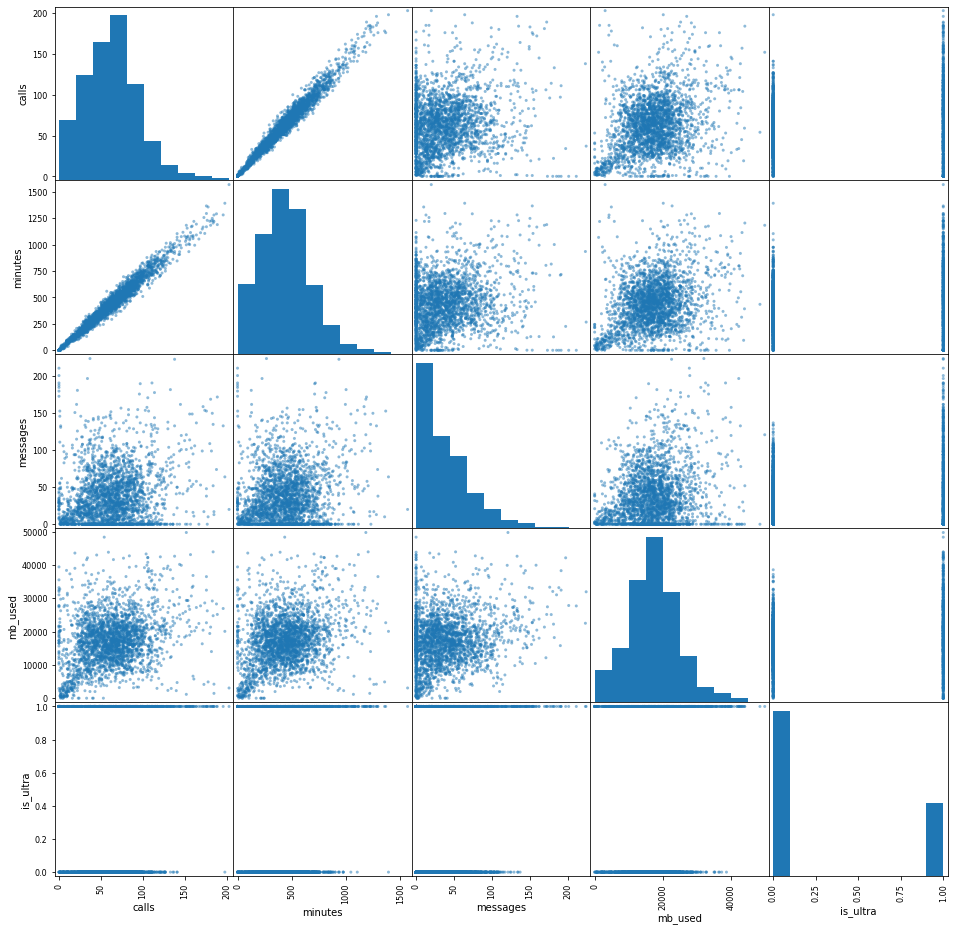

In [ ]:
pd.plotting.scatter_matrix(df, figsize = (16, 16))

In [ ]:
print(df['calls'].corr(df['minutes']))

0.9822313515750621


Как видно из графика корреляция между звонками и минутами близка к единице, а точенее равна 0.98, поэтому для анализа в данных
можно оставить только столбец со звонками. Поробуем посмотреть, как измениться решение после этого.

In [ ]:
df2=df.drop(['minutes'], axis=1)
df2.head()


,calls,messages,mb_used,is_ultra
0,40,83,19915.42,0
1,85,56,22696.96,0
2,77,86,21060.45,0
3,106,81,8437.39,1
4,66,1,14502.75,0


In [ ]:
df2_test=df2.loc[2571:]
print(df2_test.tail())

Empty DataFrame
Columns: [calls, messages, mb_used, is_ultra]
Index: []


In [ ]:
features_test_2 = df2_test.drop(['is_ultra'], axis=1)
target_test_2 = df2_test['is_ultra']

In [ ]:
features_test_2, features_test_valid_2, target_test_2, target_test_valid_2 = train_test_split(
features, target, test_size=0.20, random_state=12345)

In [ ]:
model = DecisionTreeClassifier(random_state=12345, max_depth=4)
model.fit(features_test_2, target_test_2)
predictions_valid = model.predict(features_test_valid_2)
result = accuracy_score(target_test_valid_2, predictions_valid)
print("Accuracy наилучшей модели на валидационной выборке:", result)

Accuracy наилучшей модели на валидационной выборке: 0.8093385214007782


In [ ]:
model = RandomForestClassifier(random_state=12345, n_estimators=27)
model.fit(features_test_2, target_test_2)
predictions_valid = model.predict(features_test_valid_2)
result = accuracy_score(target_test_valid_2, predictions_valid)
print("Accuracy наилучшей модели на валидационной выборке:", result)

Accuracy наилучшей модели на валидационной выборке: 0.7996108949416343


Точность предсказания модели никак не изменилось, но вероятно скорость работы увеличилась.

In [ ]:
print(df['is_ultra'].value_counts() / df.shape[0])

0   0.69
1   0.31
Name: is_ultra, dtype: float64


Проверим модель на адекватность

In [ ]:
features_1 = df.drop(['is_ultra'], axis=1)
target_1 = df['is_ultra']

In [ ]:
model = RandomForestClassifier(random_state=12345, n_estimators=27)
model.fit(features_train, target_train)
predictions= model.predict(features_1)
print("количество предсказания тарифа СМАРТ:", 1-sum(predictions)/len(df))

количество предсказания тарифа СМАРТ: 0.7088854247856586


Модель рекомендует тариф СМАРТ большему количеству людей, но не разница не очень большая. Видимо нужно считать рентабельность
на ее внедрение и тогда уже принимать решение.

In [ ]:
target = pd.Series([-0.5, 2.1, 1.5, 0.3])
predictions = pd.Series([-0.6, 1.7, 1.6, 0.2])
c=abs(target-predictions)
d=sum(c)
print(c)
print(d/len(target))

0   0.10
1   0.40
2   0.10
3   0.10
dtype: float64
0.17500000000000004
